# NetCDF Data Exploration
## File: age.2020.1.GTS2012.1m.nc

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the NetCDF file

In [2]:
ds = xr.open_dataset('datasets/age.2020.1.GTS2012.1m.nc')
ds

<xarray.Dataset> Size: 934MB
Dimensions:  (lat: 10801, lon: 21601)
Coordinates:
  * lat      (lat) float64 86kB -90.0 -89.98 -89.97 -89.95 ... 89.97 89.98 90.0
  * lon      (lon) float64 173kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    z        (lat, lon) float32 933MB ...
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdmath
    history:      grdmath /Volumes/izanagi/Agegrids/2019_v3_testing/NoMask/ag...
    GMT_version:  6.0.0_b03d6d7_2019.03.06 [64-bit]

## Basic Information

In [3]:
# Display data dimensions
print("Dimensions:")
print(ds.dims)
print("\nCoordinates:")
print(list(ds.coords.keys()))
print("\nData variables:")
print(list(ds.data_vars.keys()))

Dimensions:
FrozenMappingWarningOnValuesAccess({'lat': 10801, 'lon': 21601})

Coordinates:
['lon', 'lat']

Data variables:
['z']


## Attributes and Metadata

In [4]:
# Global attributes
print("Global attributes:")
for attr, value in ds.attrs.items():
    print(f"{attr}: {value}")

Global attributes:
Conventions: CF-1.7
title: Produced by grdmath
history: grdmath /Volumes/izanagi/Agegrids/2019_v3_testing/NoMask/agegrid_final_nomask_1m_0_GTS2012.nc /Volumes/izanagi/COBs/2019_v3_testing/GMT5_GRD/cobmask_global_1m_0.nc OR = /Volumes/izanagi/Agegrids/2019_v3_testing/Mask/agegrid_final_mask_1m_0_GTS2012.nc
GMT_version: 6.0.0_b03d6d7_2019.03.06 [64-bit]


In [5]:
# Variable attributes
print("\nVariable details:")
for var in ds.data_vars:
    print(f"\n{var}:")
    print(f"  Shape: {ds[var].shape}")
    print(f"  Dtype: {ds[var].dtype}")
    if ds[var].attrs:
        print("  Attributes:")
        for attr, value in ds[var].attrs.items():
            print(f"    {attr}: {value}")


Variable details:

z:
  Shape: (10801, 21601)
  Dtype: float32
  Attributes:
    long_name: z
    actual_range: [9.99999978e-03 3.38683990e+02]


## Statistical Summary

In [6]:
# Summary statistics for each variable
for var in ds.data_vars:
    print(f"\n{var}:")
    data = ds[var].values
    if np.issubdtype(data.dtype, np.number):
        print(f"  Min: {np.nanmin(data)}")
        print(f"  Max: {np.nanmax(data)}")
        print(f"  Mean: {np.nanmean(data):.4f}")
        print(f"  Std: {np.nanstd(data):.4f}")
        print(f"  Missing values: {np.isnan(data).sum()}")
    else:
        print(f"  Unique values: {np.unique(data).shape[0]}")


z:
  Min: 0.009999999776482582
  Max: 338.6839904785156
  Mean: 61.5582
  Std: 45.0641
  Missing values: 118585069


## Visualizations

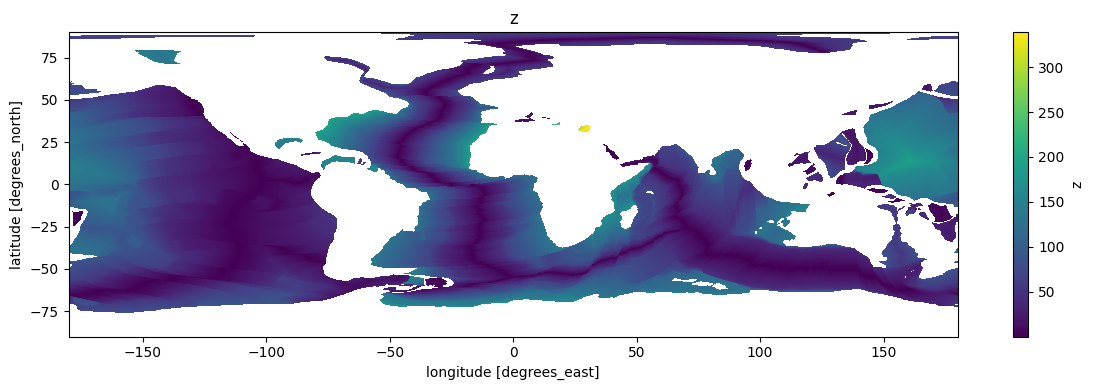

In [7]:
# Plot each variable
n_vars = len(ds.data_vars)
fig, axes = plt.subplots(n_vars, 1, figsize=(12, 4*n_vars))
if n_vars == 1:
    axes = [axes]

for ax, var in zip(axes, ds.data_vars):
    if len(ds[var].dims) == 1:
        ds[var].plot(ax=ax)
    elif len(ds[var].dims) == 2:
        ds[var].plot(ax=ax, cmap='viridis')
    ax.set_title(f"{var}")
    
plt.tight_layout()
plt.show()

## Sample Data

In [8]:
# Display first few values of each variable
for var in ds.data_vars:
    print(f"\n{var} (first 10 values):")
    if len(ds[var].dims) == 1:
        print(ds[var].values[:10])
    elif len(ds[var].dims) == 2:
        print(ds[var].values[:10, :5])  # First 10 rows, 5 columns


z (first 10 values):
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


## Export to DataFrame (if applicable)

In [9]:
# Try to convert to pandas DataFrame for easier exploration
try:
    df = ds.to_dataframe()
    print(f"DataFrame shape: {df.shape}")
    print("\nFirst few rows:")
    display(df.head(10))
except Exception as e:
    print(f"Could not convert to DataFrame: {e}")

DataFrame shape: (233312401, 1)

First few rows:


z
lat   lon            
-90.0 -180.000000 NaN
      -179.983333 NaN
      -179.966667 NaN
      -179.950000 NaN
      -179.933333 NaN
      -179.916667 NaN
      -179.900000 NaN
      -179.883333 NaN
      -179.866667 NaN
      -179.850000 NaN

## Close the dataset

In [10]:
ds.close()